In [1]:
from numba import jit
import numpy as np
import dask.bag as db
import time

In [2]:
def calc_pi(n):
    x = 2*np.random.ranf(n)-1
    y = 2*np.random.ranf(n)-1
    return 4*np.sum(x**2+y**2<1)/n

In [3]:
def calcul_pi():
    points=10000000
    pi = calc_pi(points)
    print(pi)
    
t1 = time.time()
for i in range(8):
    calcul_pi()
selftimed = time.time()-t1
print(selftimed)

3.1419164
3.1421624
3.141214
3.1406648
3.1434028
3.1418
3.1421476
3.1419388
3.139970302581787


In [4]:
@jit
def calcul_pi():
    points=10000000
    pi = calc_pi(points)
    print(pi)
    
t1 = time.time()
for i in range(8):
    calcul_pi()
selftimed = time.time()-t1
print(selftimed)

3.1423704
3.1408172
3.1407012
3.1417312
3.1421376
3.1418284
3.1415532
3.1414744
3.12227463722229


In [5]:
@jit
def calcul_pi():
    points=10000000
    pi = calc_pi(points)
    print(pi)
    
t1 = time.time()
b = db.from_sequence(range(8))
b.map(lambda x: calcul_pi()).compute()
selftimed = time.time()-t1
print(selftimed)

3.1415152
3.1410636
3.1418316
3.1413332
3.14092
3.1409768
3.1422652
3.1415352
1.982633352279663


In [6]:
def calcul_pi():
    points=10000000
    pi = calc_pi(points)
    print(pi)
    
t1 = time.time()
b = db.from_sequence(range(8))
b.map(lambda x: calcul_pi()).compute()
selftimed = time.time()-t1
print(selftimed)

3.1425532
3.1412008
3.1418448
3.1409012
3.140348
3.1412392
3.141432
3.1414236
1.8456835746765137


0.22008376299982046


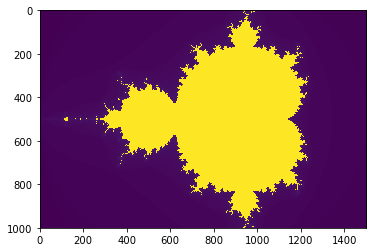

In [7]:
from __future__ import print_function, division, absolute_import

from timeit import default_timer as timer
from matplotlib.pylab import imshow, jet, show, ion
import numpy as np

from numba import jit


@jit
def mandel(x, y, max_iters):
    """
    Given the real and imaginary parts of a complex number,
    determine if it is a candidate for membership in the Mandelbrot
    set given a fixed number of iterations.
    """
    i = 0
    c = complex(x,y)
    z = 0.0j
    for i in range(max_iters):
        z = z*z + c
        if (z.real*z.real + z.imag*z.imag) >= 4:
            return i

    return 255

@jit
def create_fractal(min_x, max_x, min_y, max_y, image, iters):
    height = image.shape[0]
    width = image.shape[1]

    pixel_size_x = (max_x - min_x) / width
    pixel_size_y = (max_y - min_y) / height
    for x in range(width):
        real = min_x + x * pixel_size_x
        for y in range(height):
            imag = min_y + y * pixel_size_y
            color = mandel(real, imag, iters)
            image[y, x] = color

    return image

image = np.zeros((500 * 2, 750 * 2), dtype=np.uint8)
s = timer()
create_fractal(-2.0, 1.0, -1.0, 1.0, image, 20)
e = timer()
print(e - s)
imshow(image)
#jet()
#ion()
show()

6.398115956000765


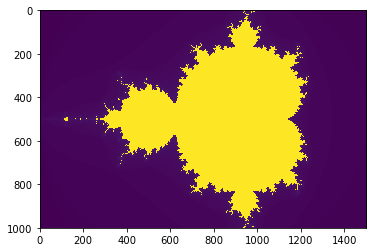

In [8]:
from __future__ import print_function, division, absolute_import

from timeit import default_timer as timer
from matplotlib.pylab import imshow, jet, show, ion
import numpy as np


def mandel(x, y, max_iters):
    """
    Given the real and imaginary parts of a complex number,
    determine if it is a candidate for membership in the Mandelbrot
    set given a fixed number of iterations.
    """
    i = 0
    c = complex(x,y)
    z = 0.0j
    for i in range(max_iters):
        z = z*z + c
        if (z.real*z.real + z.imag*z.imag) >= 4:
            return i

    return 255

def create_fractal(min_x, max_x, min_y, max_y, image, iters):
    height = image.shape[0]
    width = image.shape[1]

    pixel_size_x = (max_x - min_x) / width
    pixel_size_y = (max_y - min_y) / height
    for x in range(width):
        real = min_x + x * pixel_size_x
        for y in range(height):
            imag = min_y + y * pixel_size_y
            color = mandel(real, imag, iters)
            image[y, x] = color

    return image

image = np.zeros((500 * 2, 750 * 2), dtype=np.uint8)
s = timer()
create_fractal(-2.0, 1.0, -1.0, 1.0, image, 20)
e = timer()
print(e - s)
imshow(image)
#jet()
#ion()
show()